In [132]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
df = pd.read_csv('parkinsons.data')

In [134]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

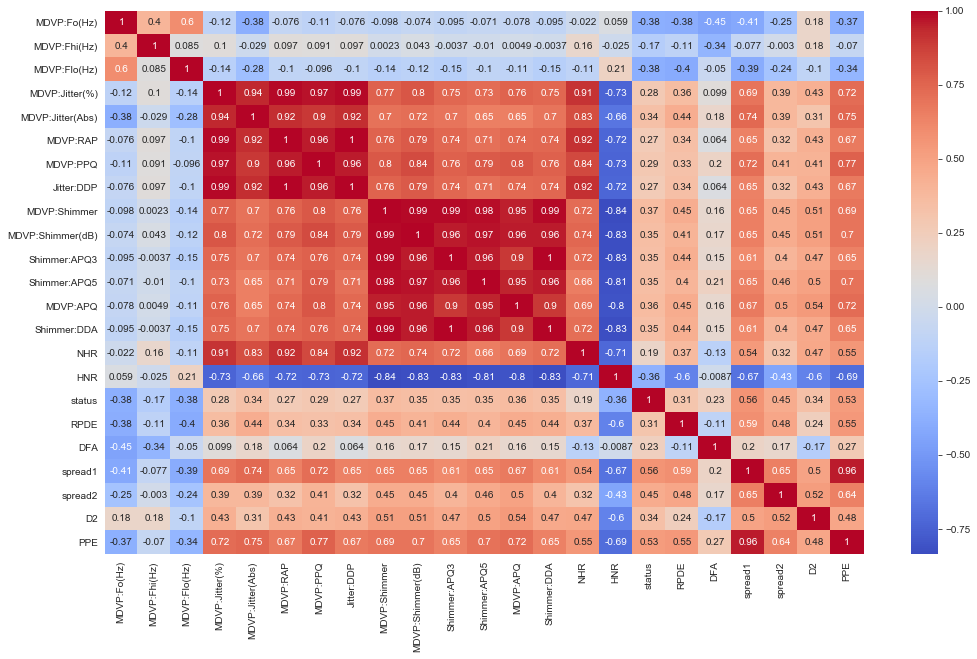

In [136]:
df_corr = df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

## 1 = Parkinson's , 0 = Healthy

In [137]:
df['status'].value_counts() 

1    147
0     48
Name: status, dtype: int64

In [138]:
df.drop('name', axis=1, inplace=True)

In [139]:
df.head(1) #check to see if the 'name' columns was removed

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scale = StandardScaler()

In [142]:
scale.fit(df.drop('status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
feat = scale.transform(df.drop('status',axis=1))

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X = feat
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=49)

## I used KNN as a classifier

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [148]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [149]:
pred = knn.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[13  1]
 [ 6 45]]


              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.98      0.88      0.93        51

    accuracy                           0.89        65
   macro avg       0.83      0.91      0.86        65
weighted avg       0.91      0.89      0.90        65



## Created a graph to display which K value results in the lowest error rate

In [152]:
error =[]

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

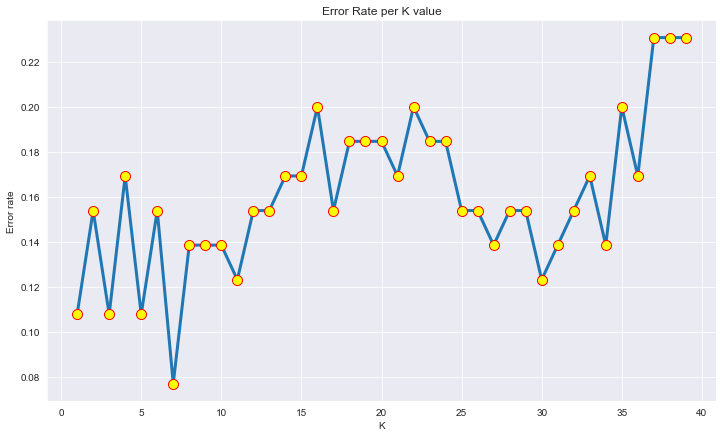

In [153]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
plt.plot(range(1,40), error, ls='-', lw=3, marker='o', mec='red', mfc='yellow', ms=10)

plt.title('Error Rate per K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [154]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [155]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[12  2]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.96      0.94      0.95        51

    accuracy                           0.92        65
   macro avg       0.88      0.90      0.89        65
weighted avg       0.93      0.92      0.92        65

